## THE SPARKS FOUNDATION
    

# Predict the percentage of Student based on no.of Study hours

Step 1: Import Library

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Step 2: Import Data-Set

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")


Data imported successfully


Step 3: Analysis of Imported Data

In [3]:
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Step 4: Plot the graph,for Detail Analysis of Data-set 

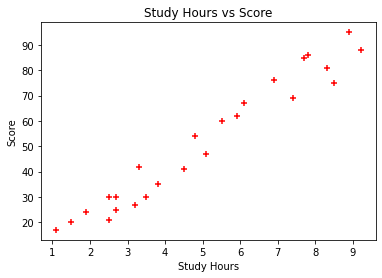

In [7]:
plt.scatter(x=data.Hours , y=data.Scores , color='red' , marker='+')
plt.xlabel("Study Hours")
plt.ylabel("Score")
plt.title("Study Hours vs Score")                             
plt.show()

<AxesSubplot:xlabel='Hours'>

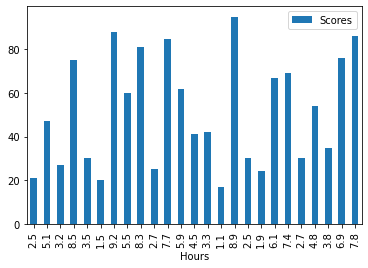

In [8]:

data.plot.bar(x="Hours",y="Scores")

Step 5: Now we have prepared data for our model

In [9]:
# data cleaning
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
data.mean()

Hours      5.012
Scores    51.480
dtype: float64

Step 6: divide the data into "attributes" (inputs) and "labels" (outputs).

In [11]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Step 7: split this data into training and test sets. 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# test_size is defining how much data we want for testing.so 0.2 means I want to use 20% of data for testing.


# Select the model and  build the model

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) 
print("training completed")


training completed


Step 8: Plotting the regression line

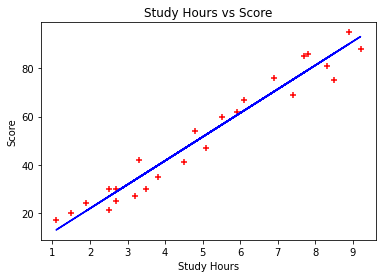

In [14]:
plt.scatter(x=data.Hours , y=data.Scores , color='r' , marker='+')
line = regressor.coef_*X_train+regressor.intercept_
plt.plot(X_train,line,color='b')
plt.xlabel("Study Hours")
plt.ylabel("Score")
plt.title("Study Hours vs Score")                             
plt.show()

Step 9: Making Predictions

In [15]:
print("shape of X test",X_test.shape)
print(X_test)
print("prediction of score")
y_pred = regressor.predict(X_test)
print(y_pred)

shape of X test (5, 1)
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
prediction of score
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


Step 10: View Actual and Predicted on test set side by side

In [16]:
df=pd.DataFrame({'Actual': y_test , 'Predicted': y_pred})
df


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


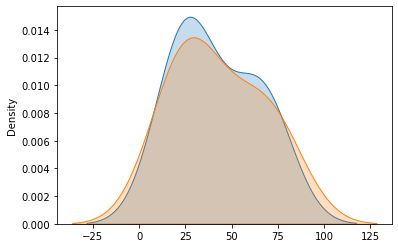

In [17]:
# Actual vs Predicted distribution plot
sns.kdeplot(data=y_test, label="Actual",shade=True );
sns.kdeplot(data=y_pred, label ="predicted",shade=True);


In [18]:
print('train accuracy: ', regressor.score(X_train,y_train),'\ntest accuracy: ', regressor.score(X_test,y_test) )

train accuracy:  0.9515510725211552 
test accuracy:  0.9454906892105354


Q.What will be the Predicted score if student Studeis for 9.25 hours/day?

In [19]:
Hours = [[9.25]]
pred = regressor.predict(Hours)
print(pred)

[93.69173249]


In [20]:
from sklearn import metrics
print('Mean absolute error:',metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error: 4.183859899002982
